In [1]:
from keras.models import load_model
model=load_model('cats_and_dogs_small_1.h5')

/home/linuxbox/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [3]:
img_path='Datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np

In [4]:
img=image.load_img(img_path,target_size=(150,150))

In [6]:
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
img_tensor.shape

(1, 150, 150, 3)

In [7]:
import matplotlib.pyplot as plt

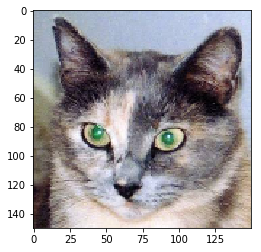

In [8]:
plt.imshow(img_tensor[0])

In [9]:
from keras import models

In [11]:
layers_output=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input,outputs=layers_output)
activations=activation_model.predict(img_tensor)

In [12]:
first_layer_activation=activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

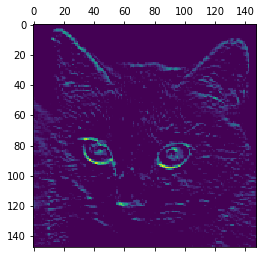

In [36]:
plt.matshow(first_layer_activation[0,:,:,6],cmap='viridis')

In [40]:
layer_names=[]
for layer in model.layers[:7]:
    layer_names.append(layer.name)

In [ ]:
images_per_row=16
for layer_name,layer_activation in zip(layer_names,activations):
    n_features=layer_activation.shape[-1]
    size=layer_activation.shape[1]
    n_cols=n_features
    display_grid=np.zeros((size*n_cols,size*images_per_row))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image=layer_activation[0,:,:,col*images_per_row+row]
            channel_image-=channel_image.mean()
            channel_image/=channel_image.std()
            channel_image*=64
            channel_image+=128
            channel_image=np.clip(channel_image,0,255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size]=channel_image
            scale = 1. / size
            plt.figure(figsize=(scale * display_grid.shape[1],
            scale * display_grid.shape[0]))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/linuxbox/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IndexError: index 32 is out of bounds for axis 3 with size 32